# Import Packages

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.decomposition import TruncatedSVD

# Loding datasets

In [3]:
ratings_file = 'ratings.csv'
ratings = pd.read_csv(ratings_file)
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [4]:
books_file = 'books.csv'
books = pd.read_csv(books_file)
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


# Data Exploration

### Books dataset

In [6]:
book_count = books.shape[0]
print('Total number of books in dataset: %s' % "{:,}".format(book_count))

ratings_on_books = books['ratings_count'].sum()
print('Total number of ratings on books in dataset: %s' % "{:,}".format(ratings_on_books))

most_ratings = books.iloc[books['ratings_count'].idxmax()]
print('Book with most ratings: %s with %s ratings' % (most_ratings['title'], "{:,}".format(most_ratings['ratings_count'])))

fewest_ratings = books.iloc[books['ratings_count'].idxmin()]
print('Book with fewest ratings: %s with %s ratings' % (fewest_ratings['title'], "{:,}".format(fewest_ratings['ratings_count'])))

highest_average_rating = books.iloc[books['average_rating'].idxmax()]
print('Book with highest average rating: %s with %s average' % (highest_average_rating['title'], highest_average_rating['average_rating']))

lowest_average_rating = books.iloc[books['average_rating'].idxmin()]
print('Book with lowest average rating: %s with %s average' % (lowest_average_rating['title'], lowest_average_rating['average_rating']))

most_5_star_ratings = books.iloc[books['ratings_5'].idxmax()]
print('Book with most 5-star ratings: %s with %s 5-star ratings' % (most_5_star_ratings['title'], "{:,}".format(most_5_star_ratings['ratings_5'])))

most_1_star_ratings = books.iloc[books['ratings_1'].idxmax()]
print('Book with most 1-star ratings: %s with %s 1-star ratings' % (most_1_star_ratings['title'], "{:,}".format(most_1_star_ratings['ratings_1'])))

Total number of books in dataset: 10,000
Total number of ratings on books in dataset: 540,012,351
Book with most ratings: The Hunger Games (The Hunger Games, #1) with 4,780,653 ratings
Book with fewest ratings: درخت زیبای من with 2,716 ratings
Book with highest average rating: The Complete Calvin and Hobbes with 4.82 average
Book with lowest average rating: One Night at the Call Center with 2.47 average
Book with most 5-star ratings: Harry Potter and the Sorcerer's Stone (Harry Potter, #1) with 3,011,543 5-star ratings
Book with most 1-star ratings: Twilight (Twilight, #1) with 456,191 1-star ratings


### Ratings dataset

In [7]:
rating_count = ratings.shape[0]
print('Total number of ratings in dataset: %s' % "{:,}".format(rating_count))

percent_of_total = (rating_count / ratings_on_books) * 100
print('Percent of total ratings included in this dataset: %s percent' % round(percent_of_total, 2))

mean_rating = ratings['rating'].mean()
print('Mean rating: %s' % round(mean_rating, 2))

median_rating = ratings['rating'].median()
print('Median rating: %s' % median_rating)

user_count = ratings['user_id'].nunique()
print('Total number of users in dataset: %s' % "{:,}".format(user_count))

ratings_per_user = rating_count / user_count
print('Ratings per user: %s' % round(ratings_per_user, 2))

Total number of ratings in dataset: 5,976,479
Percent of total ratings included in this dataset: 1.11 percent
Mean rating: 3.92
Median rating: 4.0
Total number of users in dataset: 53,424
Ratings per user: 111.87


# Data pre-processing

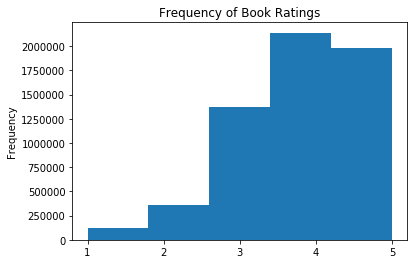

In [8]:
ratings['rating'].plot(kind='hist', bins=5, xticks=[1,2,3,4,5], title='Frequency of Book Ratings')

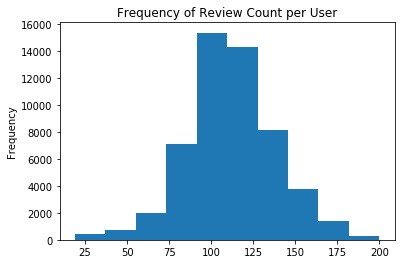

In [9]:
ratings['user_id'].value_counts().plot(kind='hist', title='Frequency of Review Count per User')

In [10]:
ratings_title = pd.merge(ratings, books[['book_id', 'title']], on='book_id' )
user_book_ratings = pd.pivot_table(ratings_title, index='user_id', columns= 'title', values='rating')

In [12]:
user_book_ratings

title,"Angels (Walsh Family, #3)","""حكايات فرغلي المستكاوي ""حكايتى مع كفر السحلاوية",#GIRLBOSS,'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die",1/4 جرام,"10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works","100 Bullets, Vol. 1: First Shot, Last Call",100 Love Sonnets,...,محال,مخطوطة بن إسحاق: مدينة الموتى,نادي السيارات,هشت کتاب,هيبتا,واحة الغروب,يوتوبيا,ڤيرتيجو,キスよりも早く1 [Kisu Yorimo Hayaku 1] (Faster than a Kiss #1),美少女戦士セーラームーン新装版 1 [Bishōjo Senshi Sailor Moon Shinsōban 1]
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
user_book_ratings = user_book_ratings.dropna(axis='columns', thresh=300)
user_book_ratings = user_book_ratings.dropna(thresh=100)

In [14]:
user_book_ratings

title,'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die",100 Selected Poems,"10th Anniversary (Women's Murder Club, #10)",11/22/63,"11th Hour (Women's Murder Club, #11)","12th of Never (Women's Murder Club, #12)","13 Little Blue Envelopes (Little Blue Envelope, #1)",1491: New Revelations of the Americas Before Columbus,...,Zodiac,Zoo,god is Not Great: How Religion Poisons Everything,الأسود يليق بك,الفيل الأزرق,تراب الماس,ساق البامبو,عزازيل,هيبتا,يوتوبيا
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
user_book_ratings_without_nan = user_book_ratings.fillna(0)
print('Original number of features:', user_book_ratings_without_nan.shape[1])

user_book_ratings_tsvd = tsvd.fit(user_book_ratings_without_nan).transform(user_book_ratings_without_nan)
print('Explained variance ratio:', tsvd.explained_variance_ratio_[0:200].sum())

tsvd = TruncatedSVD(n_components=200, random_state=42)
print('Reduced number of features:', user_book_ratings_tsvd.shape[1])

Original number of features: 4167
Explained variance ratio: 0.4578238713607182
Reduced number of features: 200


In [25]:
indices = user_book_ratings.index

book_ratings_for_clustering = pd.DataFrame(data=user_book_ratings_tsvd).set_index(indices)
print('dataset dimensions: ', book_ratings_for_clustering.shape)

dataset dimensions:  (21093, 200)


# Model

In [26]:
from sklearn.model_selection import train_test_split
book_ratings_training, book_ratings_testing = train_test_split(book_ratings_for_clustering, test_size=0.20, random_state=42)

print('Training data shape: ', book_ratings_training.shape)
print('Testing data shape: ', book_ratings_testing.shape)

Training data shape:  (16874, 200)
Testing data shape:  (4219, 200)


# Clustering

In [27]:
indices = book_ratings_testing.index
test_set_ratings = user_book_ratings.loc[indices]
test_set_ratings.head()

title,'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die",100 Selected Poems,"10th Anniversary (Women's Murder Club, #10)",11/22/63,"11th Hour (Women's Murder Club, #11)","12th of Never (Women's Murder Club, #12)","13 Little Blue Envelopes (Little Blue Envelope, #1)",1491: New Revelations of the Americas Before Columbus,...,Zodiac,Zoo,god is Not Great: How Religion Poisons Everything,الأسود يليق بك,الفيل الأزرق,تراب الماس,ساق البامبو,عزازيل,هيبتا,يوتوبيا
user_id,,,,,,,,,,,,,,,,,,,,,
13361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30375,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
mean_ratings_for_random_10 = []

# for each user, pick 10 books at random that the reader has rated and get the reader's average score for those books
for index, row in test_set_ratings.iterrows():
    ratings_without_nas = row.dropna()
    random_10 = ratings_without_nas.sample(n=10)
    random_10_mean = random_10.mean()
    mean_ratings_for_random_10.append(random_10_mean)

# get the mean of the users' mean ratings for 10 random books each    
mean_benchmark_rating = sum(mean_ratings_for_random_10) / len(mean_ratings_for_random_10)

print('Mean rating for 10 random books per test user: ', mean_benchmark_rating)

Mean rating for 10 random books per test user:  3.8912261989412946


In [29]:
from sklearn.cluster import KMeans
clusterer_KMeans = KMeans(n_clusters=7).fit(book_ratings_training)
preds_KMeans = clusterer_KMeans.predict(book_ratings_training)

In [30]:
from sklearn.metrics import silhouette_score
kmeans_score = silhouette_score(book_ratings_training, preds_KMeans)
print(kmeans_score)

0.04474137341598226


In [31]:
from sklearn.mixture import GaussianMixture
clusterer_GMM = GaussianMixture(n_components=25).fit(book_ratings_training)
preds_GMM = clusterer_GMM.predict(book_ratings_training)

In [32]:
GMM_score = silhouette_score(book_ratings_training, preds_GMM)
print(GMM_score)

0.01079558198033502


In [33]:
indices = book_ratings_training.index
preds = pd.DataFrame(data=preds_KMeans, columns=['cluster']).set_index(indices)
preds.head()

,cluster
user_id,
41190,5
12423,4
50999,0
18685,6
36751,2


In [34]:
def get_cluster_favorites(cluster_number):
    cluster_membership = preds.index[preds['cluster'] == cluster_number].tolist()
    cluster_ratings = user_book_ratings.loc[cluster_membership]
    cluster_ratings = cluster_ratings.dropna(axis='columns', thresh=10)
    means = cluster_ratings.mean(axis=0)
    favorites = means.sort_values(ascending=False)
    return favorites

In [35]:
def get_cluster_mean(cluster_number):
    cluster_membership = preds.index[preds['cluster'] == cluster_number].tolist()
    cluster_ratings = ratings[ratings['user_id'].isin(cluster_membership)]
    return cluster_ratings['rating'].mean()

In [36]:
cluster0_books_storted = get_cluster_favorites(0)
cluster0_mean = get_cluster_mean(0)
print('The cluster 0 mean is:', cluster0_mean)
cluster0_books_storted[0:10]

The cluster 0 mean is: 3.938866500900283


title
The Complete Calvin and Hobbes                                                                                  4.812500
The Harry Potter Collection 1-4 (Harry Potter, #1-4)                                                            4.739130
It's a Magical World: A Calvin and Hobbes Collection                                                            4.729730
The Calvin and Hobbes Tenth Anniversary Book                                                                    4.723684
The Complete Novels                                                                                             4.705882
Beyond the Highland Mist (Highlander, #1)                                                                       4.700000
The Mortal Instruments Boxed Set: City of Bones; City of Ashes; City of Glass (The Mortal Instruments, #1-3)    4.700000
The Secret (Highlands' Lairds #1)                                                                               4.666667
Going Postal (Discworld, #

In [37]:
cluster1_books_storted = get_cluster_favorites(1)
cluster1_mean = get_cluster_mean(1)
print('The cluster 1 mean is:', cluster1_mean)
cluster1_books_storted[0:10]

The cluster 1 mean is: 3.9607366941672497


title
The Hitchhiker's Guide to the Galaxy: A Trilogy in Four Parts            4.833333
The Complete Calvin and Hobbes                                           4.833333
The Case for Christ                                                      4.800000
Dreamfever (Fever, #4)                                                   4.785714
Faefever (Fever, #3)                                                     4.785714
The Far Side Gallery                                                     4.764706
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings    4.750000
The Name of the Wind (The Kingkiller Chronicle, #1)                      4.743902
Worlds' End (The Sandman #8)                                             4.736842
Clockwork Princess (The Infernal Devices, #3)                            4.733333
dtype: float64

In [38]:
cluster2_books_storted = get_cluster_favorites(2)
cluster2_mean = get_cluster_mean(2)
print('The cluster 2 mean is:', cluster2_mean)
cluster2_books_storted[0:10]

The cluster 2 mean is: 3.904506394480978


title
The Complete Calvin and Hobbes                                   4.923077
The Calvin and Hobbes Tenth Anniversary Book                     4.868421
Saga, Vol. 2 (Saga, #2)                                          4.800000
Saga, Vol. 1 (Saga, #1)                                          4.729167
It's a Magical World: A Calvin and Hobbes Collection             4.714286
Words of Radiance (The Stormlight Archive, #2)                   4.707657
Calvin and Hobbes                                                4.703297
The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury    4.688312
The Kindly Ones (The Sandman #9)                                 4.674419
The Wake (The Sandman #10)                                       4.638554
dtype: float64

In [39]:
cluster3_books_storted = get_cluster_favorites(3)
cluster3_mean = get_cluster_mean(3)
print('The cluster 3 mean is:', cluster3_mean)
cluster3_books_storted[0:10]

The cluster 3 mean is: 3.917458581941342


title
Guess How Much I Love You                                                                         4.833333
Harry Potter Boxset (Harry Potter, #1-7)                                                          4.815126
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics    4.809524
Harry Potter and the Deathly Hallows (Harry Potter, #7)                                           4.758938
A Court of Mist and Fury (A Court of Thorns and Roses, #2)                                        4.748252
Words of Radiance (The Stormlight Archive, #2)                                                    4.736842
Acheron (Dark-Hunter #14)                                                                         4.735294
A Voice in the Wind (Mark of the Lion, #1)                                                        4.733333
The Book of Mormon: Another Testament of Jesus Christ                                             4.730769
Schindler's List               

In [40]:
cluster4_books_storted = get_cluster_favorites(4)
cluster4_mean = get_cluster_mean(4)
print('The cluster 4 mean is:', cluster4_mean)
cluster4_books_storted[0:10]

The cluster 4 mean is: 3.8155198059631785


title
The Book of Mormon: Another Testament of Jesus Christ    5.000000
Holy Bible: New International Version                    4.857143
Fruits Basket, Vol. 1                                    4.800000
Words of Radiance (The Stormlight Archive, #2)           4.800000
The Cat in the Hat and Other Dr. Seuss Favorites         4.789474
Complete Poems, 1904-1962                                4.750000
Saga, Vol. 2 (Saga, #2)                                  4.750000
The Paper Bag Princess                                   4.750000
The Harry Potter Collection 1-4 (Harry Potter, #1-4)     4.714286
The Complete Poems of Emily Dickinson                    4.703704
dtype: float64

In [41]:
cluster5_books_storted = get_cluster_favorites(5)
cluster5_mean = get_cluster_mean(5)
print('The cluster 5 mean is:', cluster5_mean)
cluster5_books_storted[0:10]

The cluster 5 mean is: 3.880677259888804


title
It's a Magical World: A Calvin and Hobbes Collection    4.823529
The Harry Potter Collection 1-4 (Harry Potter, #1-4)    4.815789
Fool's Fate (Tawny Man, #3)                             4.785714
The Kindly Ones (The Sandman #9)                        4.777778
Brief Lives (The Sandman #7)                            4.777778
Nothing to Envy: Ordinary Lives in North Korea          4.769231
Harry Potter Boxset (Harry Potter, #1-7)                4.767677
Fables and Reflections (The Sandman #6)                 4.766667
A Game of You (The Sandman #5)                          4.766667
Worlds' End (The Sandman #8)                            4.758621
dtype: float64

In [42]:
cluster6_books_storted = get_cluster_favorites(6)
cluster6_mean = get_cluster_mean(6)
print('The cluster 6 mean is:', cluster6_mean)
cluster6_books_storted[0:10]

The cluster 6 mean is: 3.852708634734172


title
It's a Magical World: A Calvin and Hobbes Collection             4.875000
The Complete Calvin and Hobbes                                   4.796875
Saga, Vol. 3 (Saga, #3)                                          4.785714
Saga, Vol. 2 (Saga, #2)                                          4.769231
The Calvin and Hobbes Tenth Anniversary Book                     4.757143
Shadowfever (Fever, #5)                                          4.727273
The Essential Calvin and Hobbes: A Calvin and Hobbes Treasury    4.724138
The Wake (The Sandman #10)                                       4.706897
Blood Song (Raven's Shadow, #1)                                  4.700000
The Constitution of the United States of America                 4.698113
dtype: float64

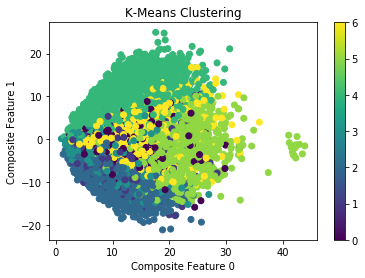

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(book_ratings_training[0],book_ratings_training[1],c=preds_KMeans)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Composite Feature 0')
ax.set_ylabel('Composite Feature 1')
plt.colorbar(scatter)

In [46]:
test_set_preds = clusterer_KMeans.predict(book_ratings_testing)
test_set_indices = book_ratings_testing.index
test_set_clusters = pd.DataFrame(data=test_set_preds, columns=['cluster']).set_index(test_set_indices)
test_set_clusters.to_csv('clusters_pred.csv')
test_set_clusters.head()

,cluster
user_id,
13361,5
4326,5
31159,2
10579,6
30375,4


# Recommendation Function

In [47]:
def recommend(cluster_assignments, ratings_matrix, user_id):
    user_cluster = cluster_assignments.loc[user_id, 'cluster']
    favorites = get_cluster_favorites(user_cluster).index
    books = []
    for book in favorites:
        if np.isnan(ratings_matrix.loc[user_id, book]):
            books.append(book)
    return books[:10]

In [48]:
recommendation13361 = recommend(test_set_clusters, user_book_ratings, 13361)
print('Recommendation for user 13361: ', recommendation13361)

Recommendation for user 13361:  ["It's a Magical World: A Calvin and Hobbes Collection", 'The Harry Potter Collection 1-4 (Harry Potter, #1-4)', "Fool's Fate (Tawny Man, #3)", 'The Kindly Ones (The Sandman #9)', 'Brief Lives (The Sandman #7)', 'Nothing to Envy: Ordinary Lives in North Korea', 'Harry Potter Boxset (Harry Potter, #1-7)', 'Fables and Reflections (The Sandman #6)', 'A Game of You (The Sandman #5)', "Worlds' End (The Sandman #8)"]


# GUI

In [49]:
import tkinter as tk
from tkinter import font  as tkfont
from tkinter import *
from tkinter.ttk import Combobox
from tkinter import messagebox
import re

temp_book = books[['book_id', 'title']]
book_id_dict = pd.Series(temp_book.title.values,index=temp_book.book_id).to_dict()
number_match = re.compile('^\d+$')